The price of the European put option is: 8.0068


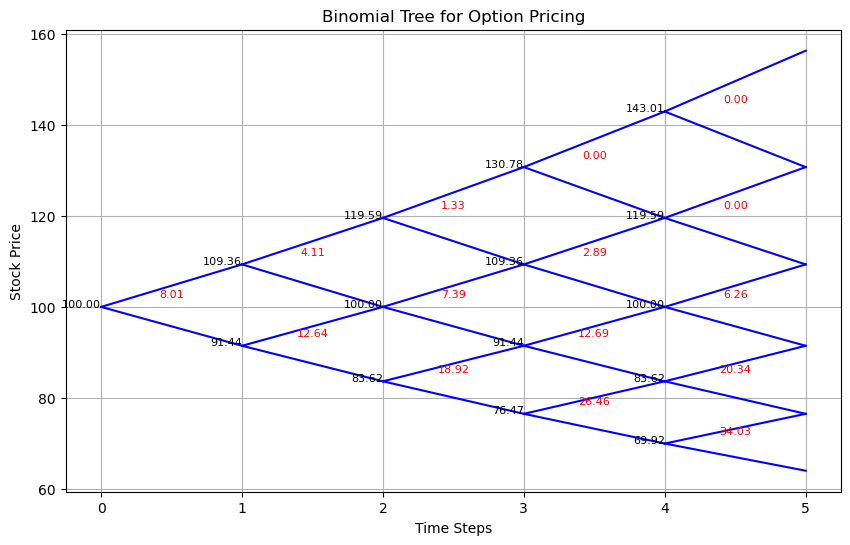

In [1]:
# Pricing European Put Option

import numpy as np
import matplotlib.pyplot as plt

def binomial_option_pricing(S, K, T, r, sigma, n, option_type):
    delta_t = T / n
    u = np.exp(sigma * np.sqrt(delta_t))
    d = 1 / u
    p = (np.exp(r * delta_t) - d) / (u - d)
    
    stock_tree = np.zeros((n + 1, n + 1))
    option_tree = np.zeros((n + 1, n + 1))
    stock_tree[0, 0] = S
    
    for i in range(1, n + 1):
        stock_tree[i, 0] = stock_tree[i - 1, 0] * u
        for j in range(1, i + 1):
            stock_tree[i, j] = stock_tree[i - 1, j - 1] * d
    
    if option_type == "call":
        option_tree[-1, :] = np.maximum(0, stock_tree[-1, :] - K)
    elif option_type == "put":
        option_tree[-1, :] = np.maximum(0, K - stock_tree[-1, :])
    else:
        raise ValueError("Invalid option type. Please choose 'call' or 'put'.")
    
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            option_tree[i, j] = np.exp(-r * delta_t) * ((1-p) * option_tree[i + 1, j + 1] +  p * option_tree[i + 1, j])

    return option_tree[0, 0], stock_tree, option_tree

def plot_binomial_tree(stock_tree, option_tree):
    n = len(stock_tree) - 1
    plt.figure(figsize=(10, 6))
    
    for i in range(n):
        for j in range(i + 1):
            plt.plot([i, i + 1], [stock_tree[i, j], stock_tree[i + 1, j]], color='b')
            plt.plot([i, i + 1], [stock_tree[i, j], stock_tree[i + 1, j + 1]], color='b')
            plt.text(i, stock_tree[i, j], f'{stock_tree[i, j]:.2f}', ha='right', color='black', fontsize=8)
            plt.text(i+0.5, stock_tree[i, j]+2, f'{option_tree[i, j]:.2f}', ha='center', color='red', fontsize=8)

    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.title('Binomial Tree for Option Pricing')
    plt.grid(True)
    plt.show()

# Example usage
initial_stock_price = 100
strike_price = 105
time_to_expiration = 1
risk_free_rate = 0.05
volatility = 0.2
time_steps = 5
option_type = "put"

option_price, stock_tree, option_tree = binomial_option_pricing(initial_stock_price, strike_price, time_to_expiration,
                                                               risk_free_rate, volatility, time_steps, option_type)

print(f"The price of the European {option_type} option is: {option_price:.4f}")
plot_binomial_tree(stock_tree, option_tree)

The price of the American put option is: 8.7253


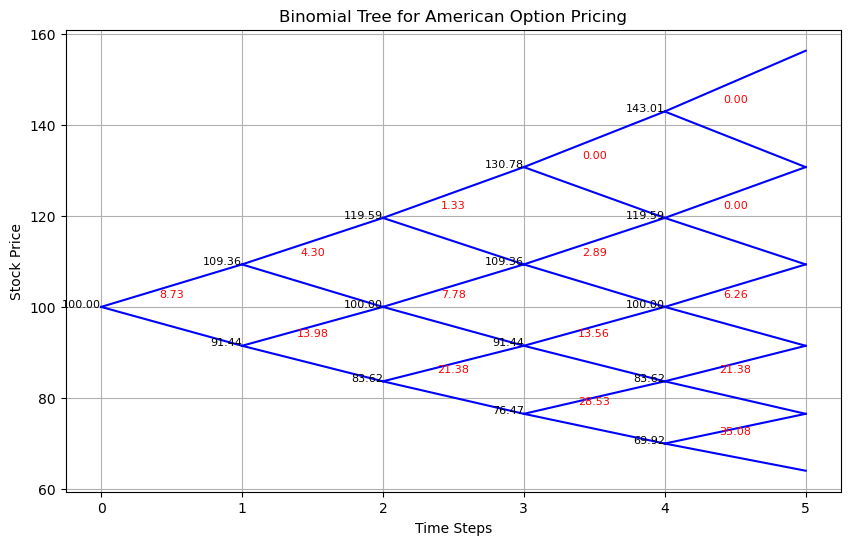

In [2]:
# Pricing American Put Option

import numpy as np
import matplotlib.pyplot as plt

def binomial_american_option_pricing(S, K, T, r, sigma, n, option_type="call"):
    delta_t = T / n
    u = np.exp(sigma * np.sqrt(delta_t))
    d = 1 / u
    p = (np.exp(r * delta_t) - d) / (u - d)
    
    stock_tree = np.zeros((n + 1, n + 1))
    option_tree = np.zeros((n + 1, n + 1))
    stock_tree[0, 0] = S
    
    for i in range(1, n + 1):
        stock_tree[i, 0] = stock_tree[i - 1, 0] * u
        for j in range(1, i + 1):
            stock_tree[i, j] = stock_tree[i - 1, j - 1] * d
    
    if option_type == "call":
        option_tree[-1, :] = np.maximum(0, stock_tree[-1, :] - K)
    elif option_type == "put":
        option_tree[-1, :] = np.maximum(0, K - stock_tree[-1, :])
    else:
        raise ValueError("Invalid option type. Please choose 'call' or 'put'.")
    
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            if option_type == "call":
                option_tree[i, j] = max(stock_tree[i, j] - K, np.exp(-r * delta_t) * ((1-p) * option_tree[i + 1, j + 1] +  p * option_tree[i + 1, j]))
            elif option_type == "put":
                option_tree[i, j] = max(K - stock_tree[i, j], np.exp(-r * delta_t) * ((1-p) * option_tree[i + 1, j + 1] +  p * option_tree[i + 1, j]))
    
    return option_tree[0, 0], stock_tree, option_tree

def plot_binomial_tree(stock_tree, option_tree):
    n = len(stock_tree) - 1
    plt.figure(figsize=(10, 6))
    
    for i in range(n):
        for j in range(i + 1):
            plt.plot([i, i + 1], [stock_tree[i, j], stock_tree[i + 1, j]], color='b')
            plt.plot([i, i + 1], [stock_tree[i, j], stock_tree[i + 1, j + 1]], color='b')
            plt.text(i, stock_tree[i, j], f'{stock_tree[i, j]:.2f}', ha='right', color='black', fontsize=8)
            plt.text(i+0.5, stock_tree[i, j]+2, f'{option_tree[i, j]:.2f}', ha='center', color='red', fontsize=8)

    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.title('Binomial Tree for American Option Pricing')
    plt.grid(True)
    plt.show()

# Example usage
initial_stock_price = 100
strike_price = 105
time_to_expiration = 1
risk_free_rate = 0.05
volatility = 0.2
time_steps = 5
option_type = "put"

option_price, stock_tree, option_tree = binomial_american_option_pricing(initial_stock_price, strike_price, time_to_expiration,
                                                                         risk_free_rate, volatility, time_steps, option_type)

print(f"The price of the American {option_type} option is: {option_price:.4f}")
plot_binomial_tree(stock_tree, option_tree)